In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\nicky\Documents\BME 574 Julia`


In [2]:
Pkg.add(["Random","Images","Colors","MAT","LinearAlgebra","MLDatasets","StatsBase","SCS","Convex","Plots","Statistics"])

   Resolving package versions...
  No Changes to `C:\Users\nicky\Documents\BME 574 Julia\Project.toml`
  No Changes to `C:\Users\nicky\Documents\BME 574 Julia\Manifest.toml`


In [3]:
using Images, Colors, MLDatasets, LinearAlgebra, StatsBase, SCS, Convex, Plots, Statistics

In [4]:
dataset = MNIST()

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :train
  features  =>    28×28×60000 Array{Float32, 3}
  targets   =>    60000-element Vector{Int64}

In [5]:
testset = MNIST(:test)

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :test
  features  =>    28×28×10000 Array{Float32, 3}
  targets   =>    10000-element Vector{Int64}

In [6]:
dataset.targets

60000-element Vector{Int64}:
 5
 0
 4
 1
 9
 2
 1
 3
 1
 4
 3
 5
 3
 ⋮
 7
 8
 9
 2
 9
 5
 1
 8
 3
 5
 6
 8

In [7]:
dataset.features

28×28×60000 Array{Float32, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0    

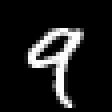

In [8]:
Gray.(dataset.features[:,:,5]')

## BME 574 Midterm Exam (take-home)

The dataset above is the famous MNIST dataset of handwritten digits (28x28 grayscale images).
The challenge for this midterm is to find the most informative pixels for each digit from this dataset
using techniques that you have learning previously.  Here is how to start:
1. Create a set of output (label) vectors $\{y_j\}$ of length 10 that represent the labels (0-9)
here are a few examples:
$$
\begin{align}
^{"}1^{"}=\begin{bmatrix} 1\\0\\0\\ \vdots \\0 \end{bmatrix}
\end{align}
$$
$$
\begin{align}
^{"}3^{"}=\begin{bmatrix} 0\\0\\1\\ \vdots \\0 \end{bmatrix}
\end{align}
$$
$$
\begin{align}
^{"}0^{"}=\begin{bmatrix} 0\\0\\0\\ \vdots \\1 \end{bmatrix}
\end{align}
$$
2. Now let $B$ be the set of output (label) vectors

$$
\begin{align}
B = \begin{bmatrix} y_{1} & y_{2} & y_{3} & \ldots & y_{n}\end{bmatrix}
\end{align}
$$

3. Let the matrix $A$ be the corresponding reshaped (vectorized) MNIST images (one in each row)

$$
\begin{align}
A = \begin{bmatrix} x_{1} & x_{2} & x_{3} & \ldots & x_{n}\end{bmatrix}
\end{align}
$$

4. $AX = B$ maps from the image space to the label space

Your task is to use solvers for $AX=B$ that promote sparsity to rank the pixels in the MNIST dataset that are most informative for correctly labeling the digits. You will have to come up with your own heuristics or empirical rules for this. Be sure to visualize the results from X. Apply your most important pixels to the test data set to see how accurate you are with as few pixels as possible. Redo the analysis with each digit individually to ﬁnd the most important pixels for each digit. Think about the interpretation of what you are doing with this $AX = B$ problem.
Hint: for testing, it may be a good idea to start with a smaller dataset (e.g. 1000 images)

### Set up AX=B
A is # of images by # of pixels (60000 x 784), x is # of pixels by # of possibilities (784 x 10), B is # of images by # of possibilities (60000 x 10)

In [9]:
# generate corresponding matrix B containing output vectors
B_temp = 1 * Matrix(I, 10, 10)

B = [];

for j in 1:length(dataset.targets)
    if dataset.targets[j] == 0
        B = push!(B, B_temp[10,:])
    else
        B = push!(B, B_temp[dataset.targets[j],:])
    end
end

B = 1 * transpose(reduce(hcat, B))

60000×10 Matrix{Int64}:
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  1  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 0  1  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0
 ⋮              ⋮           
 0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  1  0
 0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  1  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0
 0  0  1  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  1  0  0

In [10]:
# generate corresponding matrix A containing input vectors
A = [vec(dataset.features[:,:,n]') for n in 1:length(dataset.targets)]
A = 1 * transpose(reduce(hcat, A))

60000×784 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

Index: 5576
Target: 7
Label: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Image:


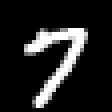

In [11]:
# confirm for proper alignment in Ax=B
k = sample(1:length(dataset.targets),1)[1]
println("Index: ", k)
println("Target: ", dataset.targets[k])
println("Label: ", B[k,:])
println("Image:")
Gray.(reshape(A[k,:],(28,28)))

In [12]:
# confirm dimensionality with pseudoinverse
A'*B

784×10 Matrix{Float32}:
 0.0        0.0       0.0  0.0        …  0.0  0.0       0.0  0.0  0.0
 0.0        0.0       0.0  0.0           0.0  0.0       0.0  0.0  0.0
 0.0        0.0       0.0  0.0           0.0  0.0       0.0  0.0  0.0
 0.0        0.0       0.0  0.0           0.0  0.0       0.0  0.0  0.0
 0.0        0.0       0.0  0.0           0.0  0.0       0.0  0.0  0.0
 0.0        0.0       0.0  0.0        …  0.0  0.0       0.0  0.0  0.0
 0.0        0.0       0.0  0.0           0.0  0.0       0.0  0.0  0.0
 0.0        0.0       0.0  0.0           0.0  0.184314  0.0  0.0  0.0
 0.0        0.0       0.0  0.0           0.0  0.74902   0.0  0.0  0.207843
 0.0        0.0       0.0  0.0           0.0  1.1451    0.0  0.0  0.0
 0.0        0.0       0.0  0.0        …  0.0  1.56863   0.0  0.0  0.0
 0.0        0.0       0.0  0.0           0.0  1.39608   0.0  0.0  0.0
 0.0        0.0       0.0  0.0           0.0  0.894118  0.0  0.0  0.0
 ⋮                                    ⋱  ⋮                   

### Solve AX=B via LASSO

In [13]:
# take a smaller sample of the MNIST data (for training lasso)
n = 10000
n_idx = sort(sample(1:length(dataset.targets),n));
targets_sample = dataset.targets[n_idx];
A_sample = A[n_idx,:];
B_sample = B[n_idx,:];

In [14]:
# function for lasso regression
function lasso(A, y, λ1)
    (T, K) = (size(A, 1), (size(A,2),size(y,2))) # <- changed from dr. strey's function
    Q = A'A / T
    c = A'y / T                      #c'b = Y'X*b

    x = Variable(K)              #define variables to optimize over
    L1 = quadform(x, Q; assume_psd=true)            #b'Q*b
    L2 = dot(c, x)                 #c'b
    L3 = norm(x, 1)                #sum(|b|)

    problem = minimize(L1 - 2 * L2 + λ1 * L3)
    solve!(problem, SCS.Optimizer; silent = true)
    return Convex.evaluate(x)
end

lasso (generic function with 1 method)

In [15]:
# run dataset through lasso function
X = lasso(A, B, 0.0001) # <- λ1 = 0.0001 produced the highest accuracy

784×10 Matrix{Float64}:
  8.84168e-19   8.84168e-19   8.84168e-19  …   8.84168e-19   8.84168e-19
  8.84168e-19   8.84168e-19   8.84168e-19      8.84168e-19   8.84168e-19
  8.84168e-19   8.84168e-19   8.84168e-19      8.84168e-19   8.84168e-19
  8.84168e-19   8.84168e-19   8.84168e-19      8.84168e-19   8.84168e-19
  8.84168e-19   8.84168e-19   8.84168e-19      8.84168e-19   8.84168e-19
  8.84168e-19   8.84168e-19   8.84168e-19  …   8.84168e-19   8.84168e-19
  8.84168e-19   8.84168e-19   8.84168e-19      8.84168e-19   8.84168e-19
  4.8746e-10   -6.74302e-11   1.4098e-9        9.64281e-10  -1.32894e-10
  2.17165e-9   -2.39021e-10   5.72512e-9       3.95624e-9   -5.19603e-10
 -1.54296e-10  -2.02141e-10   8.33099e-10     -1.45124e-9   -1.8971e-10
 -8.56975e-10  -2.74168e-10  -1.90316e-10  …  -4.74267e-9   -3.03906e-10
 -6.02261e-11   1.17854e-9    9.4945e-11      -1.4251e-10   -8.04879e-10
 -1.04903e-10   1.9245e-10    3.80958e-10     -4.52474e-9   -4.3098e-10
  ⋮                          

### Visualize Lasso results

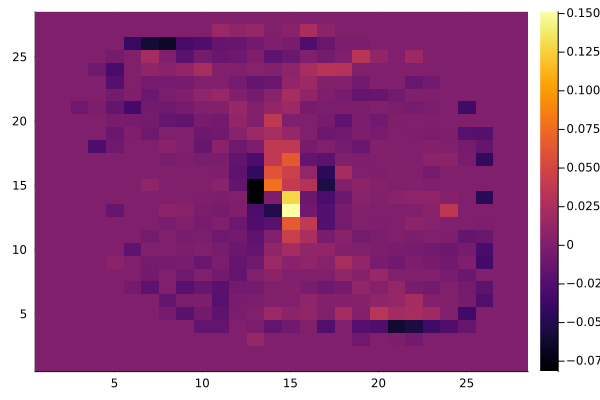

In [16]:
# 1
heatmap(reshape(X[:,1],28,28))

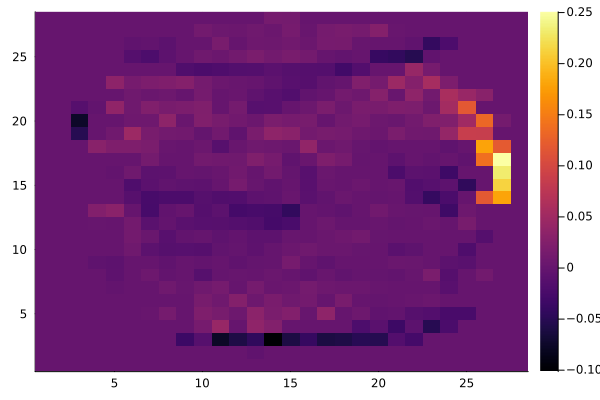

In [17]:
# 2
heatmap(reshape(X[:,2],28,28))

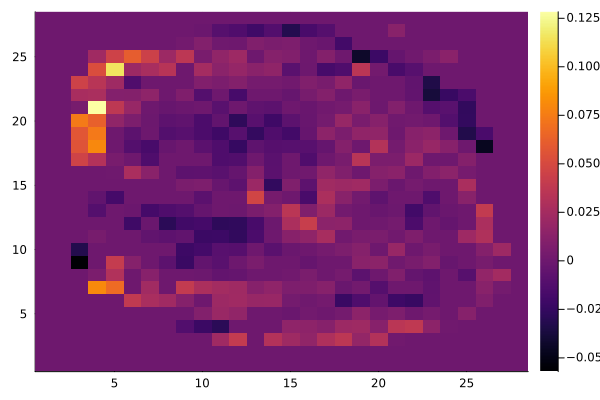

In [18]:
# 3
heatmap(reshape(X[:,3],28,28))

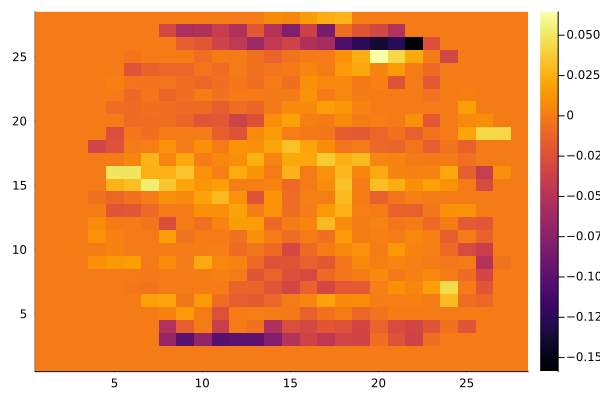

In [19]:
# 4
heatmap(reshape(X[:,4],28,28))

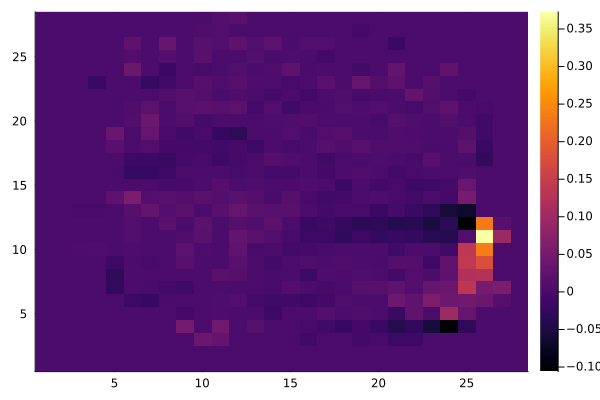

In [20]:
# 5
heatmap(reshape(X[:,5],28,28))

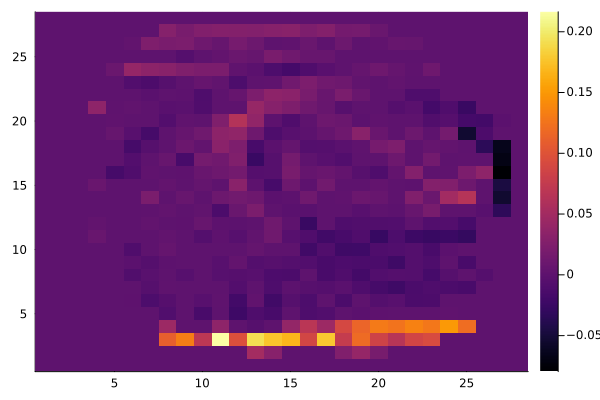

In [21]:
# 6
heatmap(reshape(X[:,6],28,28))

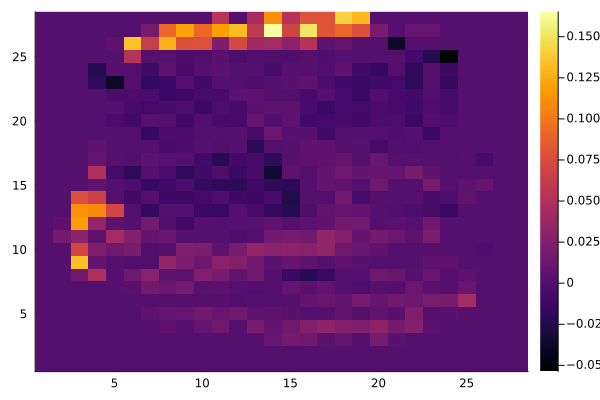

In [22]:
# 7
heatmap(reshape(X[:,7],28,28))

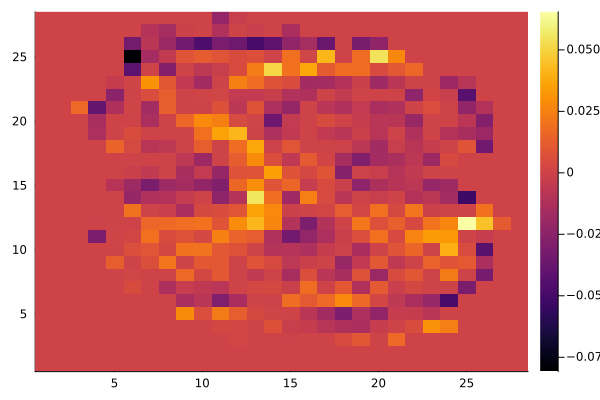

In [23]:
# 8
heatmap(reshape(X[:,8],28,28))

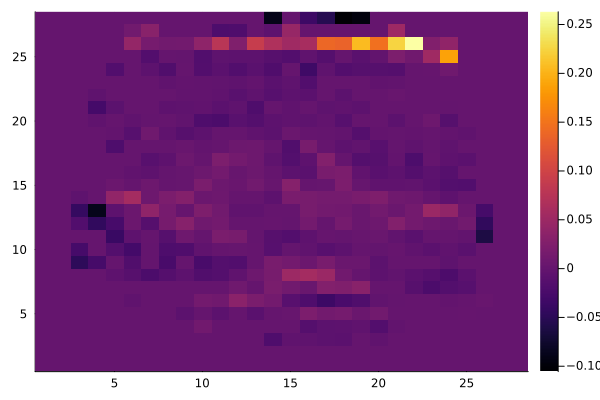

In [24]:
# 9
heatmap(reshape(X[:,9],28,28))

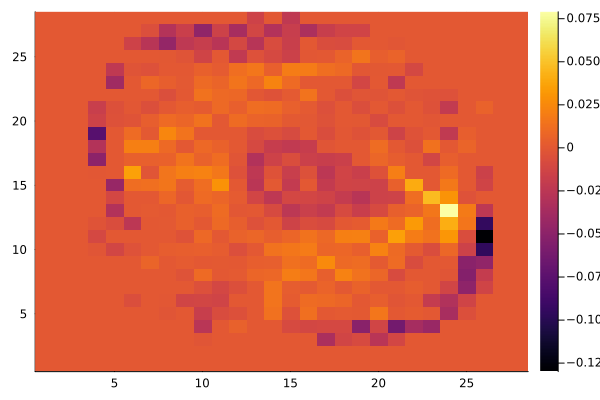

In [25]:
# 0
heatmap(reshape(X[:,10],28,28))

### Determine accuracy (using all pixels)

In [26]:
# generate matrix for B from testset
B_temp = 1 * Matrix(I, 10, 10)

B_test = [];

for j in 1:length(testset.targets)
    if testset.targets[j] == 0
        B_test = push!(B_test, B_temp[10,:])
    else
        B_test = push!(B_test, B_temp[testset.targets[j],:])
    end
end

B_test = 1 * transpose(reduce(hcat, B_test))

10000×10 Matrix{Int64}:
 0  0  0  0  0  0  1  0  0  0
 0  1  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  1  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 ⋮              ⋮           
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  1
 1  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0

In [27]:
# generate matrix for A from testset
A_test = [vec(testset.features[:,:,n]') for n in 1:length(testset.targets)]
A_test = 1 * transpose(reduce(hcat, A_test))

10000×784 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [28]:
# determine the "results"
B_lasso = A_test*X

10000×10 Matrix{Float64}:
 -0.0501735    0.0917525    0.107783    …   0.0588288   -0.0136955
 -0.220296     0.801646     0.100993       -0.0482205    0.16835
  0.686609     0.0308441    0.00498452      0.00536626   0.000620453
 -0.00606748   0.0493171   -0.0433322      -0.0516681    0.82963
 -0.0309369    0.110069    -0.00424152      0.0887574   -0.0828606
  0.817359     0.0376896    0.0390632   …   0.0060982   -0.0135808
 -0.119335    -0.177325     0.0974425       0.111579    -0.143042
  0.152096     0.0513289    0.12268         0.439361    -0.1468
  0.245139     0.157369    -0.325202        0.0579695    0.0840785
  0.119072    -0.0482084   -0.0931544       0.50749      0.0290047
 -0.0501939    0.0469934    0.139333    …  -0.18187      0.574882
  0.111526     0.161868     0.0757394       0.0538929    0.211765
 -0.00542915   0.019802    -0.0295881       0.541265     0.0495582
  ⋮                                     ⋱               
 -0.0866139   -0.0478335    0.235525       -0.120349  

In [29]:
# process the B_lasso matrix into predictions
B_lasso_processed = [Int.(B_lasso[ii,:] .== maximum(B_lasso[ii,:])) for ii in 1:length(testset)]
B_lasso_processed = 1 * transpose(reduce(hcat, B_lasso_processed))

10000×10 Matrix{Int64}:
 0  0  0  0  0  0  1  0  0  0
 0  1  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  1  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 ⋮              ⋮           
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  1
 1  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0

In [30]:
# create vector to store correct and incorrect predictions
acc_lasso = [];
incorrect = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for jj in 1:size(B_test,1)
    if B_test[jj,:] == B_lasso_processed[jj,:]
        acc_lasso = push!(acc_lasso, B_test[jj,:])
    else
        acc_lasso = push!(acc_lasso, incorrect)
    end
end

acc_lasso = 1 * transpose(reduce(hcat, acc_lasso))

10000×10 Matrix{Int64}:
 0  0  0  0  0  0  1  0  0  0
 0  1  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  1  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 ⋮              ⋮           
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  1
 1  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0

In [31]:
println("Accuracy of LASSO w/ all pixels")
println("Overall: ", sum(acc_lasso)/sum(B_test)*100, "%")
for kk in 1:10
    if kk < 10
        println("For ", kk, ": ", sum(acc_lasso[:,kk])/sum(B_test[:,kk])*100, "%")
    elseif kk == 10
        println("For 0: ", sum(acc_lasso[:,kk])/sum(B_test[:,kk])*100, "%")
    end
end

Accuracy of LASSO w/ all pixels
Overall: 85.5%
For 1: 97.53303964757708%
For 2: 79.26356589147287%
For 3: 88.41584158415841%
For 4: 88.4928716904277%
For 5: 70.06726457399103%
For 6: 91.33611691022965%
For 7: 85.11673151750972%
For 8: 76.18069815195072%
For 9: 79.58374628344896%
For 0: 96.22448979591837%


### Determine accuracy (w/ most important pixels per digit)
most important pixels will be those that are greater than the average value given through Lasso

In [32]:
# for all digits (important pixels determined by the row sums greater than the average row sum)
X_row_sum = [sum(X[row,:]) for row in 1:size(X,1)]
X_all = X[findall(x-> x > mean(X_row_sum),X_row_sum),:]
A_all = A_test[:,findall(x-> x > mean(X_row_sum),X_row_sum)]
B_all = A_all*X_all

10000×10 Matrix{Float64}:
 0.123738   0.0514108    0.0373251   -0.0622447  …   0.0532413    0.0164199
 0.310618   0.490543     0.167012    -0.0763597     -0.0384819    0.0711677
 0.686871   0.0305683    0.0587964    0.0871788     -0.0202366   -0.0543346
 0.2203    -0.0368501    0.11061      0.1213        -0.108532     0.41776
 0.108047   0.0680954    0.0184333    0.404169       0.0177721   -0.0112156
 0.887761   0.0371609    0.081147     0.0650121  …  -0.0330189   -0.0349805
 0.298016  -0.0278801    0.00911334   0.31129        0.0788975    0.0281979
 0.583122   0.01332      0.136044     0.113148       0.211777    -0.0205253
 0.353532   0.0841175   -0.120604     0.424389      -0.0156549   -0.00141151
 0.459622   0.116558    -0.0524266    0.167496       0.255314     0.00841967
 0.117223  -0.0449231    0.124911     0.0640705  …  -0.028559     0.305197
 0.600816   0.0983788    0.0414857    0.17793        0.0705394    0.154548
 0.294237  -0.00793227  -0.0338531    0.15664        0.201097   

In [33]:
B_all_processed = [Int.(B_all[ii,:] .== maximum(B_all[ii,:])) for ii in 1:length(testset)]
B_all_processed = 1 * transpose(reduce(hcat, B_all_processed))

10000×10 Matrix{Int64}:
 0  0  0  0  0  0  1  0  0  0
 0  1  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  1  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 1  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 ⋮              ⋮           
 1  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0

In [34]:
acc_all = [];
incorrect = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for jj in 1:size(B_test,1)
    if B_test[jj,:] == B_all_processed[jj,:]
        acc_all = push!(acc_all, B_test[jj,:])
    else
        acc_all = push!(acc_all, incorrect)
    end
end

acc_all = 1 * transpose(reduce(hcat, acc_all))

10000×10 Matrix{Int64}:
 0  0  0  0  0  0  1  0  0  0
 0  1  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  1  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮           
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0

In [35]:
println("Accuracy of LASSO w/ pixels important for all digits")
println("Number of pixels used: ", size(X_all,1))
println("Overall: ", sum(acc_all)/sum(B_test)*100, "%")
for kk in 1:10
    if kk < 10
        println("For ", kk, ": ", sum(acc_all[:,kk])/sum(B_test[:,kk])*100, "%")
    elseif kk == 10
        println("For 0: ", sum(acc_all[:,kk])/sum(B_test[:,kk])*100, "%")
    end
end

Accuracy of LASSO w/ pixels important for all digits
Number of pixels used: 279
Overall: 46.67%
For 1: 99.91189427312776%
For 2: 26.744186046511626%
For 3: 9.405940594059405%
For 4: 68.12627291242363%
For 5: 22.6457399103139%
For 6: 54.27974947807933%
For 7: 73.73540856031128%
For 8: 0.10266940451745381%
For 9: 15.758176412289396%
For 0: 87.04081632653062%


Taking the most important pixels for all digits dropped the accuracy quite a bit and actually did an incredibly poor job for some digits. Since I was able to do this for all digits with all pixels and important pixels, I will make a function to replicate this process for individual digits using important pixels.

In [36]:
function digit_pix(X, A_test, n)    
    X_n = X[findall(x-> x > mean(X[:,n]),X[:,n]),:]
    A_n = A_test[:,findall(x-> x > mean(X[:,n]),X[:,n])]
    B_n = A_n*X_n

    B_n_processed = [Int.(B_n[ii,:] .== maximum(B_n[ii,:])) for ii in 1:length(testset)]
    B_n_processed = 1 * transpose(reduce(hcat, B_n_processed))

    acc_n = [];
    incorrect = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    for jj in 1:size(B_test,1)
        if B_test[jj,:] == B_n_processed[jj,:]
            acc_n = push!(acc_n, B_test[jj,:])
        else
            acc_n = push!(acc_n, incorrect)
        end
    end

    acc_n = 1 * transpose(reduce(hcat, acc_n))

    println("Accuracy of LASSO w/ pixels important for ", n)
    println("Number of pixels used: ", size(X_n,1))
    println("Overall: ", sum(acc_n)/sum(B_test)*100, "%")
    for kk in 1:10
        if kk < 10
            println("For ", kk, ": ", sum(acc_n[:,kk])/sum(B_test[:,kk])*100, "%")
        elseif kk == 10
            println("For 0: ", sum(acc_n[:,kk])/sum(B_test[:,kk])*100, "%")
        end
    end
end

digit_pix (generic function with 1 method)

In [37]:
digit_pix(X, A_test, 1)

Accuracy of LASSO w/ pixels important for 1
Number of pixels used: 572
Overall: 31.740000000000002%
For 1: 100.0%
For 2: 3.391472868217054%
For 3: 0.297029702970297%
For 4: 25.050916496945007%
For 5: 0.4484304932735426%
For 6: 35.38622129436326%
For 7: 45.038910505836576%
For 8: 0.0%
For 9: 5.351833498513379%
For 0: 91.3265306122449%


In [38]:
digit_pix(X, A_test, 2)

Accuracy of LASSO w/ pixels important for 2
Number of pixels used: 200
Overall: 17.68%
For 1: 16.56387665198238%
For 2: 100.0%
For 3: 0.7920792079207921%
For 4: 0.9164969450101833%
For 5: 0.0%
For 6: 0.10438413361169101%
For 7: 46.59533073929961%
For 8: 0.0%
For 9: 5.054509415262636%
For 0: 0.0%


In [39]:
digit_pix(X, A_test, 3)

Accuracy of LASSO w/ pixels important for 3
Number of pixels used: 210
Overall: 15.53%
For 1: 23.43612334801762%
For 2: 0.0%
For 3: 100.0%
For 4: 0.10183299389002036%
For 5: 4.820627802690583%
For 6: 23.2776617954071%
For 7: 0.09727626459143969%
For 8: 0.0%
For 9: 0.8919722497522299%
For 0: 0.0%


In [40]:
digit_pix(X, A_test, 4)

Accuracy of LASSO w/ pixels important for 4
Number of pixels used: 583
Overall: 27.47%
For 1: 68.37004405286343%
For 2: 15.988372093023257%
For 3: 12.277227722772277%
For 4: 99.89816700610999%
For 5: 8.968609865470851%
For 6: 0.20876826722338201%
For 7: 9.33852140077821%
For 8: 8.932238193018481%
For 9: 0.0%
For 0: 44.48979591836735%


In [41]:
digit_pix(X, A_test, 5)

Accuracy of LASSO w/ pixels important for 5
Number of pixels used: 178
Overall: 20.549999999999997%
For 1: 84.84581497797356%
For 2: 6.104651162790697%
For 3: 0.09900990099009901%
For 4: 0.0%
For 5: 99.77578475336323%
For 6: 0.41753653444676403%
For 7: 11.381322957198444%
For 8: 0.0%
For 9: 1.6848364717542121%
For 0: 0.0%


In [42]:
digit_pix(X, A_test, 6)

Accuracy of LASSO w/ pixels important for 6
Number of pixels used: 163
Overall: 12.67%
For 1: 3.9647577092511015%
For 2: 0.0%
For 3: 0.0%
For 4: 0.0%
For 5: 0.0%
For 6: 100.0%
For 7: 24.124513618677042%
For 8: 0.0%
For 9: 1.5857284440039643%
For 0: 0.0%


In [43]:
digit_pix(X, A_test, 7)

Accuracy of LASSO w/ pixels important for 7
Number of pixels used: 177
Overall: 13.100000000000001%
For 1: 0.881057268722467%
For 2: 0.29069767441860467%
For 3: 0.0%
For 4: 9.470468431771895%
For 5: 1.1210762331838564%
For 6: 17.32776617954071%
For 7: 100.0%
For 8: 0.0%
For 9: 0.0%
For 0: 0.0%


In [44]:
digit_pix(X, A_test, 8)

Accuracy of LASSO w/ pixels important for 8
Number of pixels used: 582
Overall: 16.48%
For 1: 5.022026431718062%
For 2: 9.593023255813954%
For 3: 0.19801980198019803%
For 4: 0.7128309572301426%
For 5: 2.0179372197309418%
For 6: 22.546972860125262%
For 7: 24.027237354085603%
For 8: 100.0%
For 9: 1.1892963330029733%
For 0: 1.6326530612244898%


In [45]:
digit_pix(X, A_test, 9)

Accuracy of LASSO w/ pixels important for 9
Number of pixels used: 139
Overall: 11.93%
For 1: 13.392070484581497%
For 2: 0.0%
For 3: 0.0%
For 4: 2.9531568228105907%
For 5: 0.0%
For 6: 0.0%
For 7: 0.09727626459143969%
For 8: 0.10266940451745381%
For 9: 100.0%
For 0: 0.10204081632653061%


In [46]:
digit_pix(X, A_test, 10) # <- this is for 0, 10 is just the index and i could not 

Accuracy of LASSO w/ pixels important for 10
Number of pixels used: 595
Overall: 27.6%
For 1: 39.38325991189428%
For 2: 21.899224806201552%
For 3: 3.8613861386138613%
For 4: 6.211812627291242%
For 5: 5.044843049327354%
For 6: 43.84133611691023%
For 7: 34.04669260700389%
For 8: 10.164271047227926%
For 9: 9.31615460852329%
For 0: 99.89795918367346%


Thresholding pixels by the average of Xj was somewhat effective for increasing the accuracy for the specific digit of interest, but absolutely tanks the overall accuracy.  I also experimented with +/- 1, 2, or 3 standard deviation. However, subtracting would result in "too many" pixels being used and adding would severly diminish the accuracy of other digits and thus overall accuracy. Overall, it is possible to see that some digits require less pixels than others such as 5, 6, 7, and 9. 